In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Main Class

In [71]:
class LogisticRegression:
    def __init__(self, LR=0.01, iterations=1000):
        self.LR = LR
        self.itr = iterations
        self.theta = None
        
    def hyphothesis(self, z):
        return 1 / (1 + np.exp(-z))
    
    def scaleData(self,X):
        j = 0
        arr = np.zeros(X.shape)
        for i in X.columns:
            mean = 0
            temp = X[i]
            mean = np.mean(temp)
            temp =  (temp - mean) / np.std(temp)
            arr[:,j] = temp
            j += 1
        return arr
    
    def loss(self, X, y):
        # calculate X * theta
        z = np.dot(X,self.theta)
        # calculate hypothesis
        h = self.hyphothesis(z)
        # calculate loss
        loss = ((-y * np.log(h) - (1 - y) * np.log(1 - h))).mean()
        return loss
        
    def gradientDescent(self, X, y):
        n = len(X)
        for i in range(self.itr):
            z = np.dot(X, self.theta)
            h = self.hyphothesis(z)
            gradient = np.dot(X.T, (h - y))/ len(X)
            self.theta -= (self.LR * gradient)
        
    def fit(self, X, Y):
        print('Scalling the data')
        X = self.scaleData(X)
        ones = np.ones([X.shape[0],1])
        X = np.concatenate([ones,X],axis=1)
        self.theta = np.zeros(X.shape[1])
        print('Scalling Done')
        
        print('Initial Loss is {}'.format(self.loss(X,Y)))
        print('Running Gradient Descent')
        self.gradientDescent(X,Y)
        print('Loss after gradient descent is {}'.format(self.loss(X,Y)))
    
    def predict(self, X_test):
        X_test = self.scaleData(X_test)
        ones = np.ones([X_test.shape[0],1])
        X_test = np.concatenate([ones,X_test],axis=1)
        
        z = np.dot(X_test, self.theta)
        return self.hyphothesis(z).round()
    
    def score(self, pred, y_test):
        mean = np.mean(y_test)
        actual = np.sum((y_test - mean)**2)
        estimated = np.sum((pred - mean)**2)
        rsq = 1 - (estimated/actual)
        return rsq

# Testing on Titanic DataSet

In [72]:
data = pd.read_csv('titanic_train.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Dropping unwanted columns

In [75]:
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)

In [76]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Null values in Age and Cabin

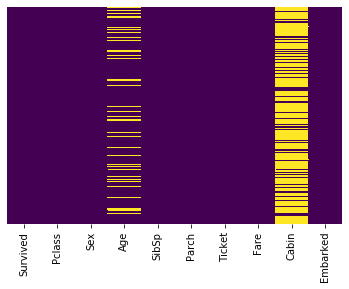

In [77]:
sns.heatmap(data.isnull(), cmap='viridis',cbar=False, yticklabels=False)

## Cabin cannot be recovered so dropped

In [78]:
data.drop('Cabin', axis=1, inplace=True)

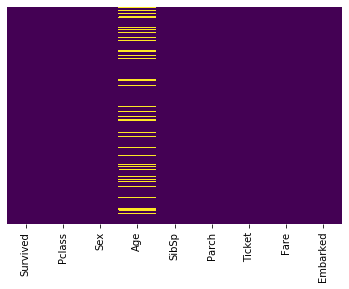

In [79]:
sns.heatmap(data.isnull(), cmap='viridis',cbar=False, yticklabels=False)

## Avg Age's of the Passangers Classes
### Can also use data[data['Pclass'] == 1]['Age'].mean() to get the avg age of classes
### but can be discovered from a box plot also.

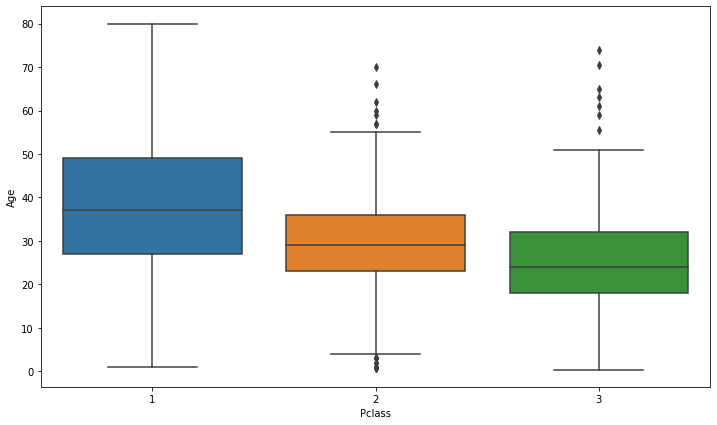

In [80]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data)

### function that takes age and class and set the values according to if.
### if null, then pclass is observed and according to it average value is returned

In [81]:
def correctAge(col):
    age = col[0]
    pclass = col[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [82]:
data['Age'] = data[['Age','Pclass']].apply(correctAge, axis=1)

## Data has now no null values

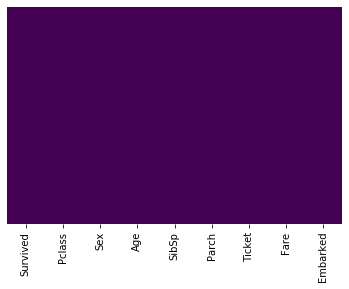

In [83]:
sns.heatmap(data=data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [84]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [85]:
data.drop('Ticket', axis=1, inplace=True)

In [86]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


## Separating the categorical columns into individual one.

In [87]:
dummySex = pd.get_dummies(data['Sex'])
dummyEmbarked = pd.get_dummies(data['Embarked'])

In [88]:
data.drop(['Sex','Embarked'], axis=1, inplace=True)

In [89]:
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


## Concatinating the new columns

In [90]:
data = pd.concat([data,dummySex,dummyEmbarked],axis=1)

In [91]:
data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


In [92]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [93]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0


In [94]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

## Actual Testing starts

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [111]:
lg = LogisticRegression(iterations=1000)

In [112]:
lg.fit(X_train,y_train)

Scalling the data
Scalling Done
Initial Loss is 0.6931471805599453
Running Gradient Descent
Loss after gradient descent is 0.45881568788316857


In [113]:
pred = lg.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score

In [114]:
print(accuracy_score(y_test,pred)*100)

79.37219730941703


## Clearly Model gets a 79.4% accuracy!!